# Cube Visualization

This tutorial shows how to visualize a cube:

In [1]:
import cubo
import xarray as xr

Create a cube with an edge size of 64 pixels from Sentinel-2 and apply a cloud coverage filter of 40 percent. Get just the RGB bands:

In [2]:
da = cubo.create(
    lat=47.848151988493385,
    lon=13.379491178028564,
    collection="sentinel-2-l2a",
    bands=["B02","B03","B04"],
    start_date="2020-01-01",
    end_date="2021-01-01",
    edge_size=64,
    resolution=10,
    query={"eo:cloud_cover": {"lt": 40}}
)
da

,Array,Chunk
Bytes,4.31 MiB,32.00 kiB
Shape,"(46, 3, 64, 64)","(1, 1, 64, 64)"
Count,414 Tasks,138 Chunks
Type,float64,numpy.ndarray


Visualize an RGB image per timestep in the cube:

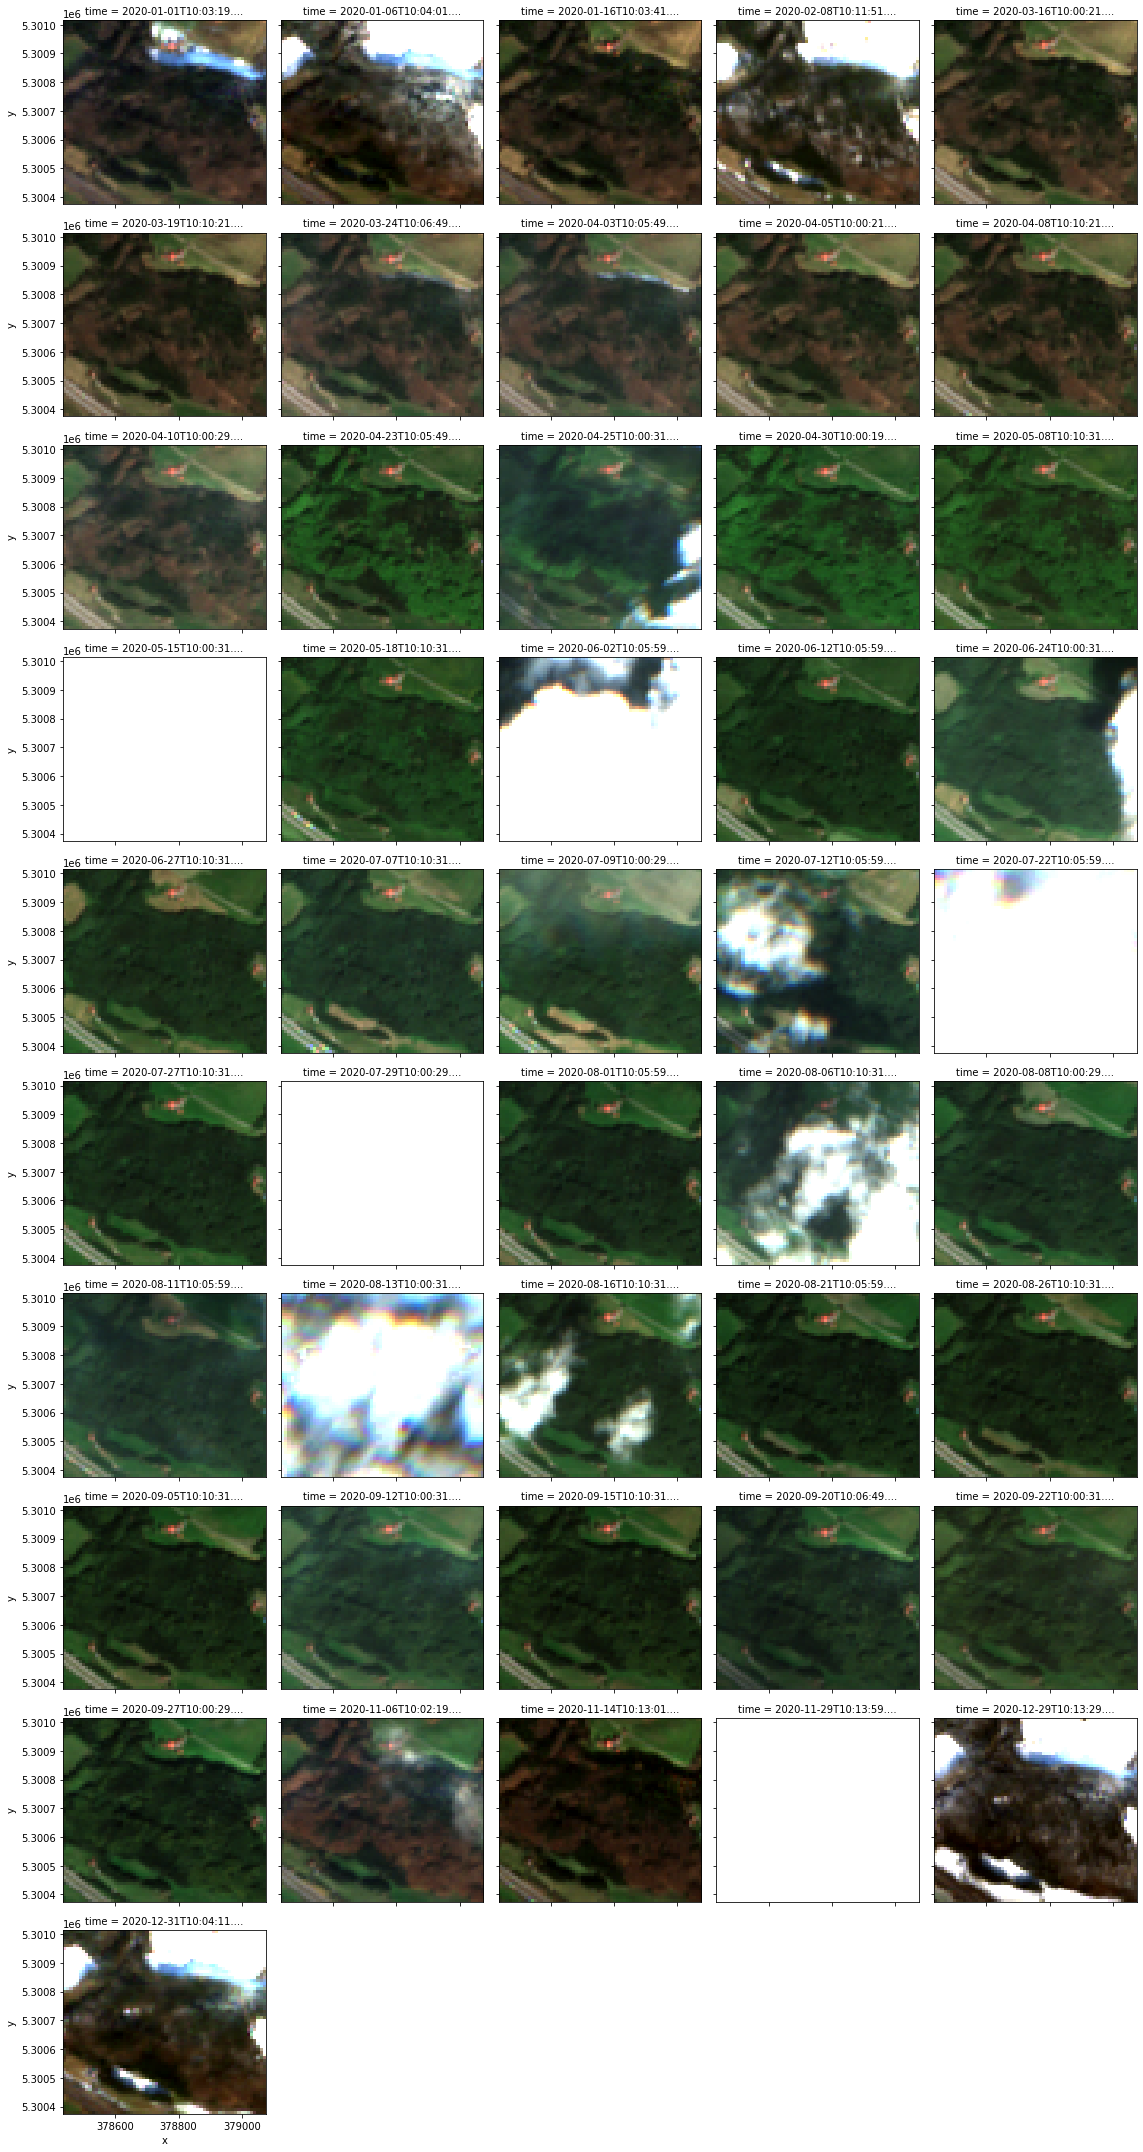

In [3]:
(da.sel(band=["B04","B03","B02"])/2000).clip(0,1).plot.imshow(col="time",col_wrap = 5)